In [1]:
import pandas as pd
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/nupursolanki/Desktop/machine_learning_modelling/data/creditcard.csv')

In [3]:
#Exploratory Data Analysis
data = data.round(3)
print(data.head())
print(data.shape)
print(data.describe())

   Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0  

[5 rows x 31 columns]
(284807, 31)
                Time            V1     

In [5]:
class_count = data['Class'].value_counts()
print(class_count)

0    284315
1       492
Name: Class, dtype: int64


There are only 492 fraudulent transactions compared to ~284k non fraudulent transactions. So the data that we have is unbalanced. 

Text(0.5, 1.0, 'Heatmap of Correlation')

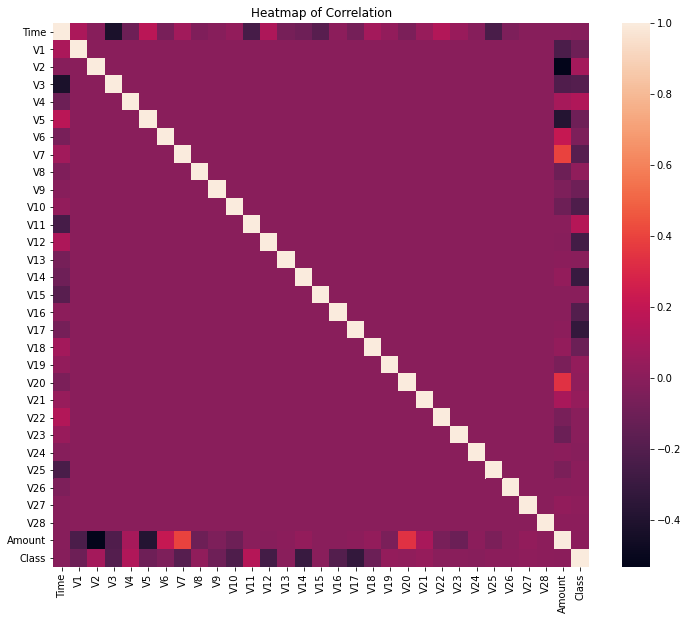

In [6]:
#Heatmap of correlation
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [7]:
#amount stats
amt_stats = data['Amount'].describe()
print(amt_stats)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64




We see that the 75th %tile amount is 77 whereas maximum is ~25k. So there are outliers. Lets further check how many outliers are there.

In [11]:
d1 = data.loc[(data['Amount']>2000) & (data['Class'] ==1)]

We will keep only data where amount is less than 10000 to remove outliers.

In [12]:
print(d1)

            Time     V1     V2     V3    V4     V5     V6    V7     V8    V9  \
176049  122608.0 -2.003 -7.159 -4.051  1.31 -2.058 -0.099  2.88 -0.727  1.46   

        ...    V21    V22    V23    V24    V25    V26    V27    V28   Amount  \
176049  ...  1.244 -1.015 -1.801  0.658 -0.436 -0.895 -0.398  0.314  2125.87   

        Class  
176049      1  

[1 rows x 31 columns]


In [9]:
data=data.loc[data['Amount']<8000]

(array([2.80174e+05, 3.41800e+03, 7.19000e+02, 2.41000e+02, 1.27000e+02,
        6.30000e+01, 2.20000e+01, 1.30000e+01, 9.00000e+00, 9.00000e+00]),
 array([   0.   ,  787.942, 1575.884, 2363.826, 3151.768, 3939.71 ,
        4727.652, 5515.594, 6303.536, 7091.478, 7879.42 ]),
 <BarContainer object of 10 artists>)

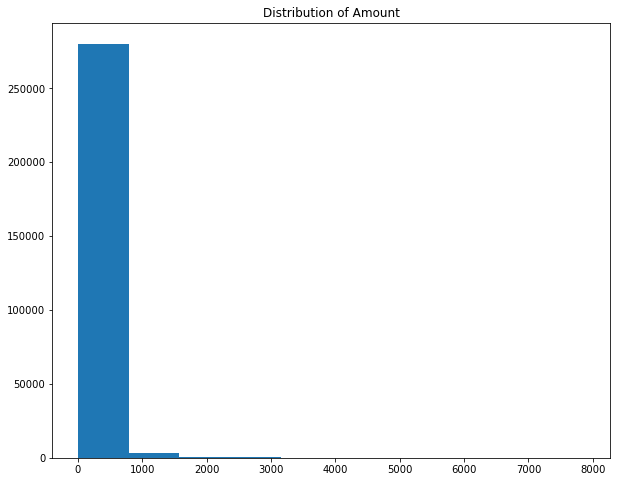

In [10]:
#Distribution of amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
plt.hist(data['Amount'], bins=10)


In [11]:
#Time stats and distribution
time_stats = data['Time'].describe()
print(time_stats)

count    284795.000000
mean      94813.167148
std       47487.985425
min           0.000000
25%       54201.500000
50%       84691.000000
75%      139320.000000
max      172792.000000
Name: Time, dtype: float64


Text(0, 0.5, 'Amount')

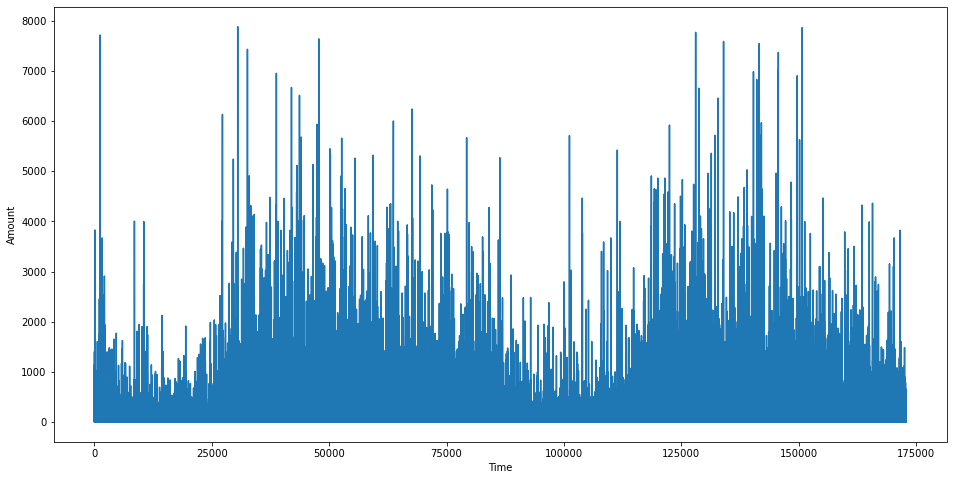

In [12]:
plt.figure(figsize=(16,8))
plt.plot(data['Time'],data['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')

In [13]:
fraud_df = data.loc[data['Class']==1]
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771937,3.623789,-7.033274,4.542028,-3.151232,-1.397722,-5.568713,0.570648,-2.581128,...,0.713606,0.014045,-0.040297,-0.105114,0.041431,0.051650,0.170598,0.075667,122.211321,1.0
std,47835.365138,6.783700,4.291204,7.110964,2.873324,5.372473,1.858124,7.206761,6.797792,2.500895,...,3.869327,1.494592,1.579657,0.515570,0.797217,0.471698,1.376767,0.547293,256.683288,0.0
min,406.000000,-30.552000,-8.402000,-31.104000,-1.313000,-22.106000,-6.406000,-43.557000,-41.044000,-13.434000,...,-22.798000,-8.887000,-19.254000,-2.028000,-4.782000,-1.153000,-7.263000,-1.869000,0.000000,1.0
25%,41241.500000,-6.035750,1.188500,-8.643750,2.372750,-4.792750,-2.501750,-7.965000,-0.195500,-3.872250,...,0.042000,-0.533500,-0.342250,-0.437250,-0.314000,-0.259500,-0.020250,-0.109000,1.000000,1.0
50%,75568.500000,-2.342500,2.718000,-5.075000,4.177500,-1.523000,-1.425000,-3.034500,0.621500,-2.208500,...,0.592500,0.048500,-0.073000,-0.060500,0.088500,0.004000,0.395000,0.146500,9.250000,1.0
75%,128483.000000,-0.419250,4.971250,-2.276250,6.349000,0.214750,-0.413500,-0.945500,1.764500,-0.787500,...,1.244500,0.617250,0.308250,0.285250,0.456500,0.397000,0.826250,0.381000,105.890000,1.0
max,170348.000000,2.132000,22.058000,2.250000,12.115000,11.095000,6.474000,5.803000,20.007000,3.354000,...,27.203000,8.362000,5.466000,1.091000,2.208000,2.745000,3.052000,1.779000,2125.870000,1.0


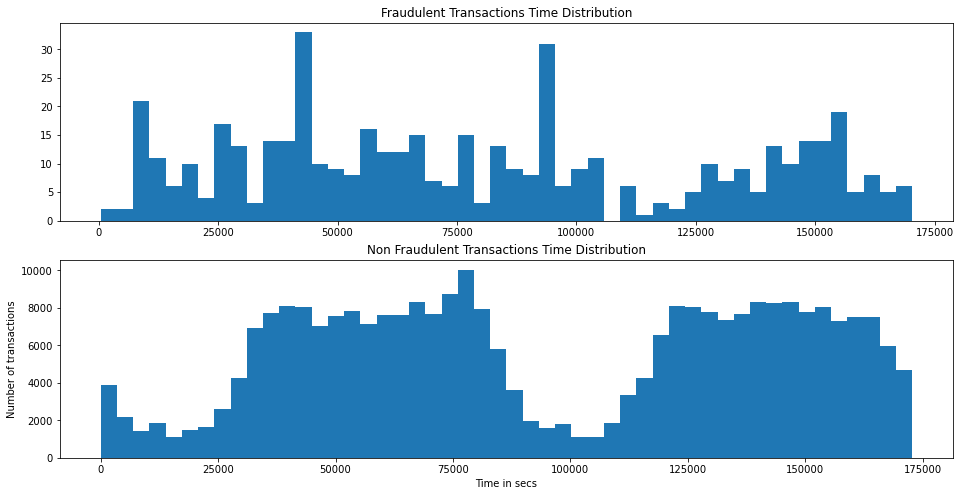

In [14]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(16,8))
ax1.hist(data.Time[data.Class==1],bins=50)
ax1.set_title("Fraudulent Transactions Time Distribution")
ax2.hist(data.Time[data.Class==0],bins=50)
ax2.set_title("Non Fraudulent Transactions Time Distribution")
plt.xlabel('Time in secs')
plt.ylabel('Number of transactions')
plt.show()

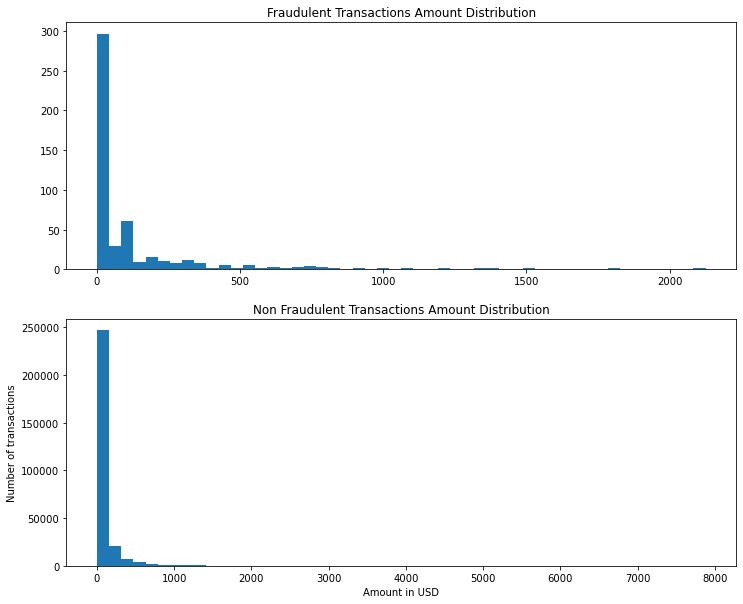

In [15]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))
ax1.hist(data.Amount[data.Class==1],bins=50)
ax1.set_title("Fraudulent Transactions Amount Distribution")
ax2.hist(data.Amount[data.Class==0],bins=50)
ax2.set_title("Non Fraudulent Transactions Amount Distribution")
plt.xlabel('Amount in USD')
plt.ylabel('Number of transactions')
plt.show()

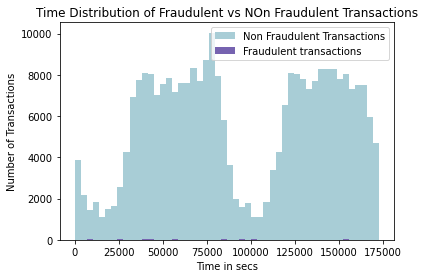

In [22]:
def overlaid_histogram(data1, data2, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0", x_label="", y_label="", title=""):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 50
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    if n_bins == 0:
        bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
        bins = n_bins

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 0.5, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 1, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
    
overlaid_histogram(data.Time[data['Class']==0],fraud_df['Time'],data1_name = "Non Fraudulent Transactions",
                   data2_name = "Fraudulent transactions",x_label="Time in secs",y_label="Number of Transactions",
                  title="Time Distribution of Fraudulent vs NOn Fraudulent Transactions")

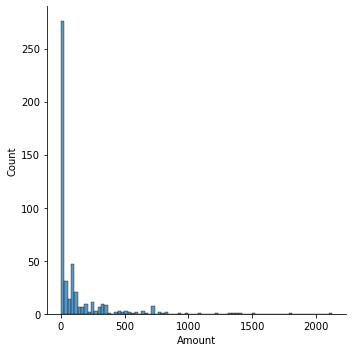

In [16]:
sns.displot(
    data=fraud_df.Amount, kind="hist")

## Case 1 : 
Sampling: Random Undersampling || Without standardization


In [16]:
#Sampling to solve the imbalance data issue: SMOTE and imblearn random undersampling
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
X = data
y = data['Class']

print('Original dataset shape {}'.format(Counter(y)))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284303, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


We have 984 rows in udersampled data. We will display that.

In [17]:
from sklearn.model_selection import train_test_split

train_data = X_res.loc[:,data.columns!="Class"]
print(y_res.shape)

(984,)


We will now divide the undersampled data into train test split with test size as 30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, 
                                                    y_res, 
                                                    stratify = y_res, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


We are done with sampling. We now apply scaling to standardize the amount and time columns.

In [19]:
from sklearn.preprocessing import StandardScaler

for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

<ipython-input-19-1928d3505c25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
<ipython-input-19-1928d3505c25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))
<ipython-input-19-1928d3505c25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

We now have the data ready. We apply random forest classifier on training data.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Predict using the test data

In [22]:
y_predict = pd.DataFrame(rfc.predict(X_test))

We now measure performance using confusion matrix and ROC curves

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat_rus = confusion_matrix(y_test,y_predict)
print(confusion_mat_rus)

[[143   5]
 [ 12 136]]


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print(tn,fp,fn,tp)

143 5 12 136


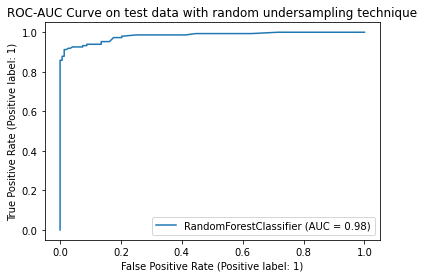

In [28]:
#ROC curve
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)
plt.title('ROC-AUC Curve on test data with random undersampling technique')
plt.show()


We will now do the same with oversampling

In [30]:
#Oversampled dataset
#Resampling
from imblearn.over_sampling import RandomOverSampler
X = data
y = data['Class']
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

train_data1 = x_ros.loc[:,data.columns!="Class"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_data1, 
                                                    y_ros, 
                                                    stratify = y_ros, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


Original dataset shape Counter({0: 284303, 1: 492})
Resampled dataset shape Counter({0: 284303, 1: 284303})


In [31]:
from sklearn.preprocessing import StandardScaler

for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train1[col] = scaler.fit_transform(X_train1[col].values.reshape(-1, 1))
    X_test1[col] = scaler.transform(X_test1[col].values.reshape(-1, 1))

<ipython-input-31-a6545378d582>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[col] = scaler.fit_transform(X_train1[col].values.reshape(-1, 1))
<ipython-input-31-a6545378d582>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1[col] = scaler.transform(X_test1[col].values.reshape(-1, 1))
<ipython-input-31-a6545378d582>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [32]:
rfc1 = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc1.fit(X_train1,y_train1)
y_predict1 = pd.DataFrame(rfc1.predict(X_test1))


[[143   5]
 [ 12 136]]


In [34]:
confusion_mat_ros = confusion_matrix(y_test1,y_predict1)
print(confusion_mat_ros)

tn, fp, fn, tp = confusion_matrix(y_test1,y_predict1).ravel()



[[85284     7]
 [    0 85291]]


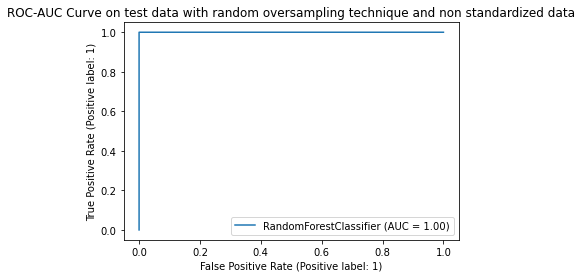

In [42]:
rfc_disp1 = plot_roc_curve(rfc1, X_test1, y_test1)
plt.title('ROC-AUC Curve on test data with random oversampling technique')
plt.show()

In [35]:
#SMOTE sampling dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))



Original dataset shape Counter({0: 284303, 1: 492})
Resample dataset shape Counter({0: 284303, 1: 284303})


In [36]:
train_data2 = x_smote.loc[:,data.columns!="Class"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_data2, 
                                                    y_smote, 
                                                    stratify = y_smote, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


In [37]:
for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train2[col] = scaler.fit_transform(X_train2[col].values.reshape(-1, 1))
    X_test2[col] = scaler.transform(X_test2[col].values.reshape(-1, 1))

<ipython-input-37-9c37c1b71b0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2[col] = scaler.fit_transform(X_train2[col].values.reshape(-1, 1))
<ipython-input-37-9c37c1b71b0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test2[col] = scaler.transform(X_test2[col].values.reshape(-1, 1))
<ipython-input-37-9c37c1b71b0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [38]:
rfc2 = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc2.fit(X_train2,y_train2)
y_predict2 = pd.DataFrame(rfc2.predict(X_test2))



[[85273    18]
 [    3 85288]]


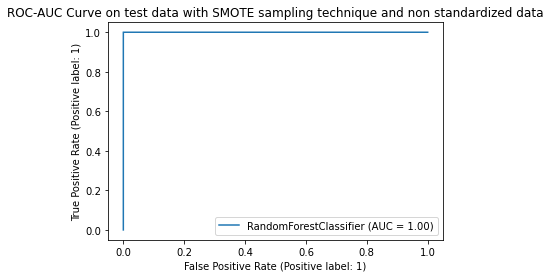

In [39]:
confusion_mat_smote = confusion_matrix(y_test2,y_predict2)
print(confusion_mat_smote)

tn, fp, fn, tp = confusion_matrix(y_test2,y_predict2).ravel()

ax = plt.gca()
rfc_disp2 = plot_roc_curve(rfc2, X_test2, y_test2, ax=ax)
plt.title('ROC-AUC Curve on test data with SMOTE sampling technique')
plt.show()


For logisitc we will use X_train an dy_train that we had used for random undersampling in random forests


knn
tree
xgboost


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
ylogit_predict = pd.DataFrame(clf.predict(X_test))


[[145   3]
 [ 11 137]]


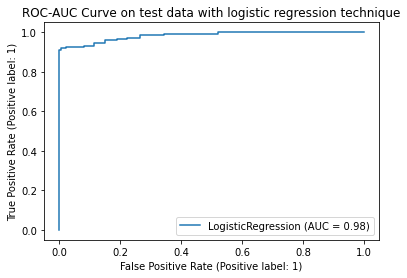

In [42]:
#confusion matrix and ROC
confusion_mat_logit = confusion_matrix(y_test,ylogit_predict)
print(confusion_mat_logit)
lr_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC-AUC Curve on test data with logistic regression technique')
plt.show()

In [45]:
clf.predict_proba(X_test)
clf.score(X_train, y_train)

0.9534883720930233

In [46]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

Try later
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                    feature_names=train_data.columns,  
                      class_names='Class',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [52]:
ydtc_predict = pd.DataFrame(dtc.predict(X_test))

[[135  13]
 [  9 139]]


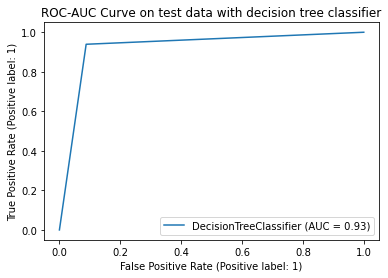

In [53]:
confusion_mat_dtc = confusion_matrix(y_test,ydtc_predict)
print(confusion_mat_dtc)
dtc_disp = plot_roc_curve(dtc, X_test, y_test)
plt.title('ROC-AUC Curve on test data with decision tree classifier')
plt.show()

In [54]:
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [56]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
